Use cases of NLP ..Imagine you work for Google News and you want to group news articles by topic or maybe you work for a legal firm and you need to sift through thousands of pages of legal documents to find the relevant

In [35]:
import nltk

In [36]:
# nltk.download_shell()

In [37]:
message = [line.rstrip() for line in open('SMSSpamCollection')]

In [38]:
len(message)

5574

In [39]:
message[50]


'ham\tWhat you thinked about me. First time you saw me in class.'

In [40]:
for mes_no,mes in enumerate(message[:10]):
    print(mes_no,mes)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

Due to the spacing we can tell that this is a [TSV](http://en.wikipedia.org/wiki/Tab-separated_values) ("tab separated values") file, where the first column is a label saying whether the given message is a normal message (commonly known as "ham") or "spam". The second column is the message itself. (Note our numbers aren't part of the file, they are just from the **enumerate** call).

Using these labeled ham and spam examples, we'll **train a machine learning model to learn to discriminate between ham/spam automatically**. Then, with a trained model, we'll be able to **classify arbitrary unlabeled messages** as ham or spam.

From the official SciKit Learn documentation, we can visualize our process:

In [41]:
message[50]   ### seperated by space i.e \t

'ham\tWhat you thinked about me. First time you saw me in class.'

In [42]:
import pandas as pd
messages = pd.read_csv('SMSSpamCollection',sep='\t',names=['label','message'])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [43]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [44]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [45]:
messages['length']=messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<Axes: ylabel='Frequency'>

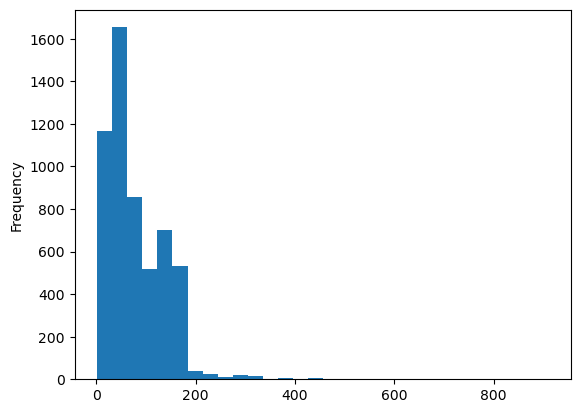

In [46]:
messages['length'].plot.hist(bins=30)

In [47]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [48]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

Grid hist for spam and ham

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

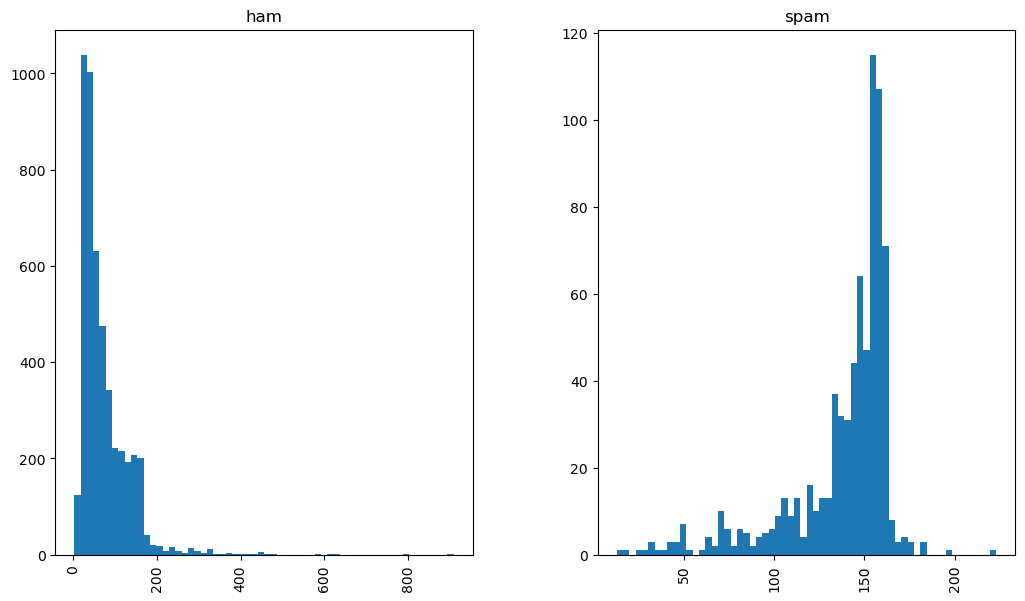

In [49]:
messages.hist(column = 'length',by='label',bins=60,figsize=(12,7))

In [50]:
import string

In [51]:
mess = 'Sample message! Notice: it has punctuation.'

In [52]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [53]:
nopunc =[char for char in mess if char not in string.punctuation]
nonpunc=''.join(nopunc)
nonpunc

'Sample message Notice it has punctuation'

Now remove stop words using NLP


In [54]:
from nltk.corpus import stopwords

In [55]:
stopwords.words('english')  ### We do not want these stopwords as do not useful in classfying message into ham or spam

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [56]:
nonpunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [57]:
clean_mess = [word for word in nonpunc.split() if word.lower() not in stopwords.words('english')]

In [58]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [59]:
#### now form a function
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    

In [60]:
messages['message'].apply(text_process)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, 2, contact, u, U, £750, Pou...
5568                   [ü, b, going, esplanade, fr, home]
5569                     [Pity, mood, Soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [Rofl, true, name]
Name: message, Length: 5572, dtype: object

In [61]:
messages.head()


,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Stemming is a natural language processing technique used to reduce words to their base or root form. The purpose of stemming is to simplify words so that variations of the same word can be treated as a single entity.
The goal of both stemming and lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form. For instance:


 Vectorization
Vectorization is a fundamental process in Natural Language Processing (NLP) that involves converting text data into numerical vectors, which machine learning algorithms can process. In NLP, we work with textual data, and most machine learning models require numerical input for training and prediction. Vectorization enables us to represent textual data in a format that can be effectively used by these models.
..There are various techniques for vectorization in NLP, and some of the common ones include:

1.Bag of Words (BoW):In the context of the Bag of Words (BoW) vectorization technique in Natural Language Processing (NLP), "Each document is represented as a vector where each element corresponds to the frequency of a word in the vocabulary within that document" means that we create a numerical representation (vector) for each document based on the count of words present in that document from the vocabulary.
Here's a step-by-step explanation of how it works:

Create the Vocabulary:

First, we collect all the unique words present in the entire corpus (collection of documents) and create a vocabulary. The vocabulary contains every unique word that appears in any of the documents.

1.1 Tokenization: Each document in the corpus is then tokenized, meaning it is split into individual words or tokens.
.. Punctuation marks and other non-essential characters are usually removed during tokenization.

1.2 Counting Word Frequencies: For each document, we count how many times each word from the vocabulary appears in that specific document.
.. The word count for each word in a document forms a part of the vector representation for that document.

1.3 Vector Representation: The vector representation of a document is created by using the vocabulary as a reference.
..The length of the vector is equal to the size of the vocabulary (number of unique words).
..Each element (index) of the vector corresponds to a specific word from the vocabulary, and its value is the frequency of that word in the document.


eg using BOW
Example:
Let's consider a simple corpus with three documents:

Document 1: "I love NLP."
Document 2: "NLP is fun."
Document 3: "Machine learning is interesting."

Vocabulary: ["I", "love", "NLP", "is", "fun", "Machine", "learning", "interesting"]

Now, we represent each document as a vector based on the word frequencies from the vocabulary:

Document 1: [1, 1, 1, 0, 0, 0, 0, 0] # "I" appears once, "love" appears once, "NLP" appears once, others are not present.
Document 2: [0, 0, 1, 1, 1, 0, 0, 0] # "NLP" appears once, "is" appears once, "fun" appears once, others are not present.
Document 3: [0, 0, 0, 1, 0, 1, 1, 1] # "Machine" appears once, "learning" appears once, "is" appears once, others are not present.
As you can see, each document is represented as a numerical vector where the elements correspond to the frequency of each word in the vocabulary within that document. The vector captures the distribution of words in the document, disregarding the order of words and only considering their frequencies.








Currently, we have the messages as lists of tokens (also known as lemmas) and now we need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with.

Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.

We'll do that in three steps using the bag-of-words model:

Count how many times does a word occur in each message (Known as term frequency)

Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

Let's begin the first step:

In [62]:
from sklearn.feature_extraction.text import CountVectorizer

In this code below, you are initializing the CountVectorizer with the argument analyzer=text_process. The analyzer parameter is set to the custom function text_process. This means that the CountVectorizer will use text_process as the preprocessor to convert text data into tokens before vectorization. It's essential to have this function defined beforehand and ensure that it correctly tokenizes and preprocesses the text data.
Fit the Vectorizer:

The fit() method is called on the CountVectorizer object with the "message" column of the "messages" DataFrame as the input. This step is also known as "fitting" the vectorizer to the data.
During the fitting process, the CountVectorizer learns the vocabulary from the text data in the "message" column. It collects all the unique words (tokens) from the messages and creates a vocabulary.
Vectorization:

After fitting the CountVectorizer, it's ready to transform the text data into numerical vectors. This transformation is performed using the transform() method.
However, in the code snippet you provided, the transform() method is not called explicitly. It's possible that it is used later in the code to actually perform the vectorization on the entire "message" column.
After this process, you will have a vectorized representation of the text data from the "message" column in the "messages" DataFrame. Each document (message) will be represented as a numerical vector based on the frequencies of words in the BoW vocabulary. The resulting vectors can be used as input for machine learning algorithms or other NLP tasks.

The fit() method is called on the CountVectorizer object with the "message" column of the "messages" DataFrame as the input. This step is also known as "fitting" the vectorizer to the data.



In [63]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [64]:
len(bow_transformer.vocabulary_)

11425

In [65]:
mess4 = messages['message'][3]
mess4

'U dun say so early hor... U c already then say...'

After fitting the CountVectorizer, it's ready to transform the text data into numerical vectors. This transformation is performed using the transform() method.\
This means that there are seven unique words in message number 4 (after removing common stop words). Two of them appear twice, the rest only once. Let's go ahead and check and confirm which ones appear twice:


In [66]:
bow4 =bow_transformer.transform([mess4])
print(bow4)
print(bow4.shape)


  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


In [67]:
## now get which number repeated twice
bow_transformer.get_feature_names_out()[9554]

'say'

Now we can use .transform on our Bag-of-Words (bow) transformed object and transform the entire DataFrame of messages. Let's go ahead and check out how the bag-of-words counts for the entire SMS corpus is a large, sparse matrix:


In [70]:
messages_bow = bow_transformer.transform(messages['message'])  ### this is sparse matrix

In [71]:
print(messages_bow.nnz)  ### no of non zero
print(messages_bow.shape)

50548
(5572, 11425)


Sparsity = (no_of_nonzero element)/(total_no_of_element)

In [72]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))  ### total_no of non zero/(no of rows * no of columns)
print('sparsity: {}'.format((sparsity)))

sparsity: 0.07940295412668218


**TF-IDF**\
The mathematics behind TF-IDF involves the calculation of Term Frequency (TF) and Inverse Document Frequency (IDF) scores for each term in the document collection.

1.Term Frequency (TF):\
Term Frequency measures how frequently a term (word) occurs in a document.
It is calculated as the number of occurrences of a term (t) in a document (d) divided by the total number of terms in that document (|d|).\
Mathematically, the TF score of a term (t) in a document (d) is given by:\
TF(t, d) = (Number of occurrences of term t in document d) / |d|

In some cases, people use a modified version of the TF formula to avoid bias towards longer documents, such as:\
TF(t, d) = (Number of occurrences of term t in document d) / (Total number of terms in document d)

2.Inverse Document Frequency (IDF):\
Inverse Document Frequency measures the rarity of a term across the entire collection of documents.
It is calculated as the logarithm of the total number of documents (N) divided by the number of documents containing the term (n(t)).\
Mathematically, the IDF score of a term (t) is given by:\
IDF(t) = log(N / n(t))\
One common adjustment is to add 1 to the denominator (n(t) + 1) to prevent division by zero and smooth the IDF scores:\
IDF(t) = log((N + 1) / (n(t) + 1))

3.TF-IDF Calculation:\
The TF-IDF score for a term (t) in a specific document (d) is obtained by multiplying the TF and IDF scores for that term.
This combines the local importance (TF) of the term in the document with its global rarity (IDF) across the entire collection.\
TF-IDF(t, d) = TF(t, d) * IDF(t)

4.Vector Representation:\
The TF-IDF transformer converts each document into a numerical vector, where each dimension corresponds to a unique term in the entire collection.\
The value in each dimension is the TF-IDF score of the corresponding term in the document.

The final result is a numerical representation of the document that captures the importance of each term relative to the entire document collection. This numerical representation can be used for various machine learning tasks, such as text classification, clustering, and information retrieval.







In [102]:
from sklearn.feature_extraction.text import TfidfTransformer

In [74]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [75]:
tfidf4 = tfidf_transformer.transform(bow4)

In [76]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [77]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format((sparsity)))

sparsity: 0.07940295412668218


After the counting, the term weighting and normalization can be done with TF-IDF, using scikit-learn's TfidfTransformer.

In [78]:
from sklearn.feature_extraction.text import TfidfTransformer

In [79]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [80]:
tfidf4 = tfidf_transformer.transform(bow4)

In [81]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [82]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [83]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

3.2800524267409408
8.527076498901426


Now apply for ur data

In [84]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 11425)


In [85]:
print(messages_tfidf.nnz)

50548


Naive Bayes is a popular classification algorithm based on Bayes' theorem, which is used for solving machine learning problems, particularly in natural language processing and text classification tasks.
The foundation of Naive Bayes is Bayes' theorem, which mathematically expresses the relationship between conditional probabilities. In the context of classification, it helps us calculate the probability of a particular class (C) given the observed features (X).

Assumption of Independence: As mentioned earlier, the "naive" aspect of Naive Bayes lies in assuming that all features are independent of each other, given the class label. This means that the presence or absence of one feature does not affect the presence or absence of another feature, which may not hold true in reality.

Training Phase: During the training phase, the algorithm learns the prior probabilities of each class (P(C)) and the likelihood probabilities of each feature given the class (P(X|C)). The prior probability of a class is the proportion of training samples that belong to that class. The likelihood probability of a feature given a class is the proportion of samples in that class having that specific feature.

Prediction Phase: Once the model is trained, it can be used to make predictions on new, unseen data. To classify a new instance, the algorithm calculates the posterior probability of each class given the features of the instance using Bayes' theorem. The class with the highest posterior probability is then assigned as the predicted class for the instance.


In [86]:
from sklearn.naive_bayes import MultinomialNB

In [87]:
spam_detect_model= MultinomialNB().fit(messages_tfidf,messages['label'])

In [88]:
print('prediction:',spam_detect_model.predict(tfidf4)[0])

prediction: ham


In [89]:
messages['label'][3]  ## tfidf4 is created fro mess4

'ham'

In [90]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', messages.label[3])

predicted: ham
expected: ham


In [91]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [92]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

We can use SciKit Learn's built-in classification report, which returns precision, recall, f1-score, and a column for support (meaning how many cases supported that classification). 

Precision: It measures the accuracy of positive predictions made by the model. In other words, it calculates the ratio of true positives to the sum of true positives and false positives.

Recall (Sensitivity or True Positive Rate): It measures the model's ability to correctly identify positive instances. It calculates the ratio of true positives to the sum of true positives and false negatives.

F1 Score: The F1 score is the harmonic mean of precision and recall. It provides a balanced measure between precision and recall, especially when dealing with imbalanced datasets.


In [93]:
from sklearn.metrics import classification_report

In [94]:
print(classification_report(messages['label'],all_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



The cost of mis-predicting "spam" as "ham" is probably much lower than mis-predicting "ham" as "spam".

In the above "evaluation",we evaluated accuracy on the same data we used for training. You should never actually evaluate on the same dataset you train on!

Such evaluation tells us nothing about the true predictive power of our model. If we simply remembered each example during training, the accuracy on training data would trivially be 100%, even though we wouldn't be able to classify any new messages.

A proper way is to split the data into a training/test set, where the model only ever sees the training data during its model fitting and parameter tuning. The test data is never used in any way. This is then our final evaluation on test data is representative of true predictive performance.



In [95]:
from sklearn.model_selection import train_test_split
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.2)

In [96]:
print(len(msg_train),len(msg_test),len(msg_train)+len(msg_test))

4457 1115 5572


The test size is 20% of the entire dataset (1115 messages out of total 5572), and the training is the rest (4457 out of 5572). Note the default split would have been 30/70.

This is basically what you're going to be doing when you actually work with real world text data.
You won't be doing all the steps I just did in the previous two sections of this lecture series because skt learned has a data pipeline feature which will save you so much more time.

In [97]:
from sklearn.pipeline import Pipeline

In [98]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [99]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000028EDF661CF0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [100]:
predictions = pipeline.predict(msg_test)

In [101]:
from sklearn.metrics import classification_report
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       976
        spam       1.00      0.76      0.86       139

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115

